In [ ]:
pip install pandas

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
raw_dataset = pd.read_csv("dataset_phishing.csv")


<Axes: xlabel='status'>

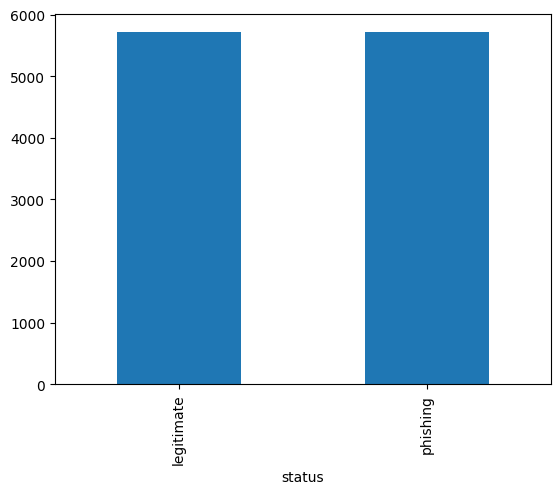

In [ ]:
status_counts = raw_dataset.groupby('status').size()

status_counts.plot(kind='bar')


In [ ]:
raw_dataset.shape

(11430, 89)

In [ ]:
raw_dataset.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [ ]:
print(raw_dataset['status'].unique())

['legitimate' 'phishing']


In [ ]:
print(raw_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
original_dataset = raw_dataset.copy()

In [ ]:
class_map = {'legitimate':0, 'phishing':1}
original_dataset['status'] = original_dataset['status'].map(class_map)

In [ ]:
original_dataset.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank  status  
0             1          4       0  
1             1          2       1  
2             1          0       1  
3             0          3       0  
4             0          6       0  

[5 rows x 89 columns]

In [ ]:
original_dataset.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...  domain_in_title  domain_with_copyright  \
count  11430.000000  ...     11430.000000           11430.000000   
mean       0.293176  ...         0.775853               0.439545   
std        0.998317  ...         0.417038               0.496353   
min        0.000000  ...         0.000000               0.000000   
25%        0.000000  ...         1.000000               0.000000   
50%        0.000000  ...         1.000000               0.000000   
75%        0.000000  ...         1.000000               1.000000   
max       19.000000  ...         1.000000               1.000000   

       whois_registered_domain  domain_registration_length    domain_age  \
count             11430.000000                11430.000000  11430.000000   
mean                  0.072878                  492.532196   4062.543745   
std                   0.259948                  814.769415   3107.784600   
min                   0.000000                   -1.000000    -12.000000   
25%                   0.000000                   84.000000    972.250000   
50%                   0.000000                  242.000000   3993.000000   
75%                   0.000000                  449.000000   7026.750000   
max                   1.000000                29829.000000  12874.000000   

        web_traffic    dns_record  google_index     page_rank        status  
count  1.143000e+04  11430.000000  11430.000000  11430.000000  11430.000000  
mean   8.567566e+05      0.020122      0.533946      3.185739      0.500000  
std    1.995606e+06      0.140425      0.498868      2.536955      0.500022  
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000  
25%    0.000000e+00      0.000000      0.000000      1.000000      0.000000  
50%    1.651000e+03      0.000000      1.000000      3.000000      0.500000  
75%    3.738455e+05      0.000000      1.000000      5.000000      1.000000  
max    1.076799e+07      1.000000      1.000000     10.000000      1.000000  

[8 rows x 88 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def corr_heatmap(data, idx_s, idx_e):
    y = data['status']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

<ipython-input-17-247810e94454>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp.corr(), annot=True, fmt='.2f')


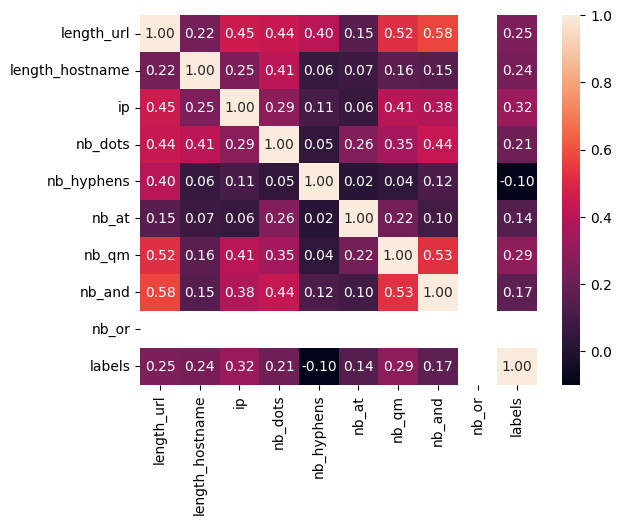

In [ ]:
corr_heatmap(original_dataset, 0, 10)

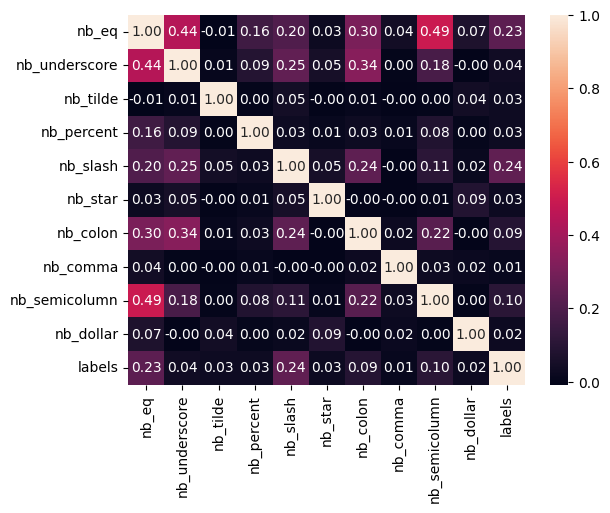

In [ ]:
corr_heatmap(original_dataset, 10, 20)

In [ ]:
corr_matrix = original_dataset.corr()

<ipython-input-20-38786badcde8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = original_dataset.corr()


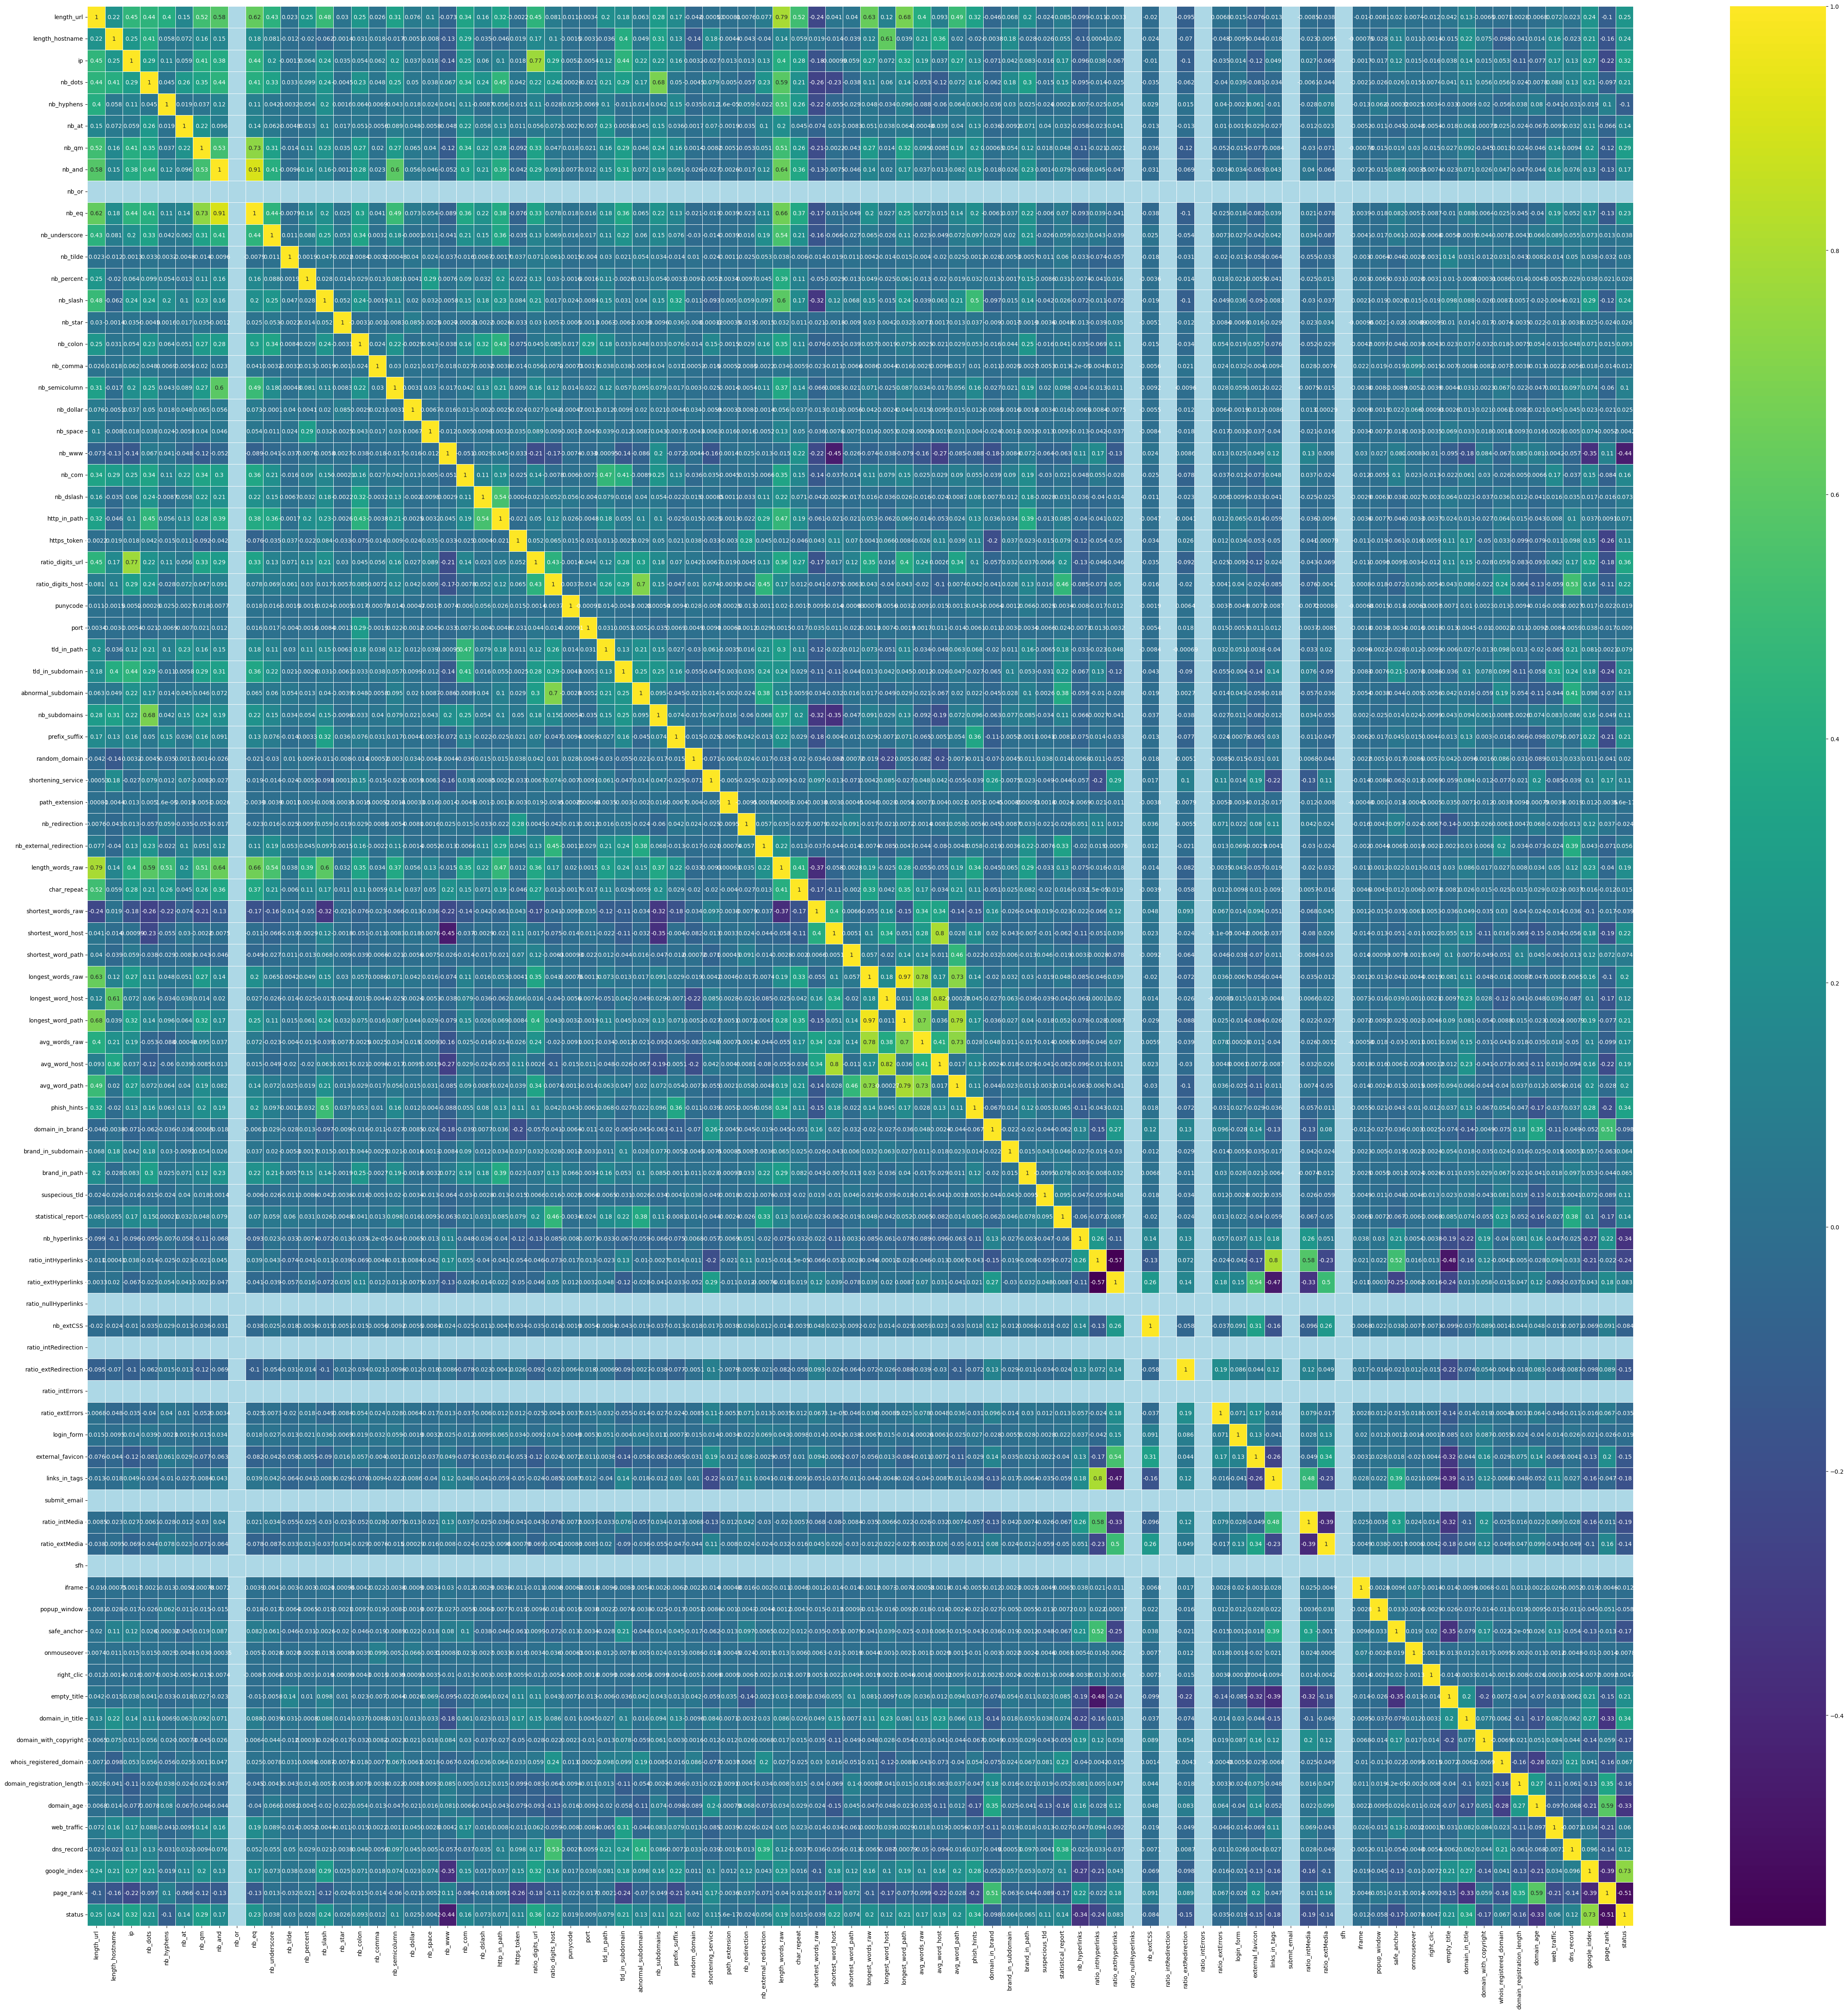

In [ ]:
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue')
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [ ]:
corr_matrix['status']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [ ]:
status_corr = corr_matrix['status']

In [ ]:
def feature_selector_correlation(cmatrix, threshold):

    selected_features = []
    feature_score = []
    i=0
    for score in cmatrix:
        if abs(score)>threshold:
            selected_features.append(cmatrix.index[i])
            feature_score.append( ['{:3f}'.format(score)])
        i+=1
    result = list(zip(selected_features,feature_score))
    return result

In [ ]:
target_column = 'status'

# Sélectionner un sous-ensemble de colonnes à analyser (par exemple, les 10 premières colonnes)
features_to_analyze = raw_dataset.iloc[:, :86]
selected_features = []
p_values = []
# Créer une table de contingence entre chaque caractéristique et la classe cible
for column in features_to_analyze.columns:
    contingency_table = pd.crosstab(features_to_analyze[column], raw_dataset[target_column])

    # Effectuer le test du chi carré
    chi2, p, dof, expected = chi2_contingency(contingency_table)
# Stocker la p-value
    p_values.append((column, p))
 # Trier les p-values par ordre croissant
p_values.sort(key=lambda x: x[1])

# Sélectionner les 20 premières caractéristiques
selected_features = [feature for feature, _ in p_values[:20]]

# Imprimer les caractéristiques sélectionnées
print("features_selected: :")
print(selected_features)

features_selected: :
['nb_www', 'char_repeat', 'shortest_word_host', 'longest_word_path', 'phish_hints', 'nb_hyperlinks', 'links_in_tags', 'safe_anchor', 'domain_in_title', 'nb_dots', 'ip', 'longest_words_raw', 'avg_word_host', 'web_traffic', 'nb_qm', 'length_hostname', 'shortest_words_raw', 'domain_age', 'ratio_extRedirection', 'ratio_intHyperlinks']


In [ ]:
X_selected = original_dataset[selected_features]
X_selected

nb_www  char_repeat  shortest_word_host  longest_word_path  \
0           1            4                   3                  6   
1           0            4                  19                 32   
2           0            2                   3                 17   
3           0            0                   5                  0   
4           1            3                   3                 11   
...       ...          ...                 ...                ...   
11425       1            4                   3                 11   
11426       1            3                   3                  8   
11427       1            5                   3                 15   
11428       1            3                   3                  0   
11429       1            8                   2                 12   

       phish_hints  nb_hyperlinks  links_in_tags  safe_anchor  \
0                0             17      80.000000     0.000000   
1                0             30     100.000000   100.000000   
2                0              4     100.000000   100.000000   
3                0            149     100.000000    62.500000   
4                0            102      76.470588     0.000000   
...            ...            ...            ...          ...   
11425            0            199      80.000000     0.000000   
11426            0              3     100.000000     0.000000   
11427            0             68       6.250000    80.000000   
11428            0             32      16.666667     0.000000   
11429            3             21       0.000000    33.333333   

       domain_in_title  nb_dots  ip  longest_words_raw  avg_word_host  \
0                    0        3   0                 11           7.00   
1                    1        1   1                 32          19.00   
2                    1        4   1                 17           8.40   
3                    1        2   0                  5           5.00   
4                    0        2   0                 11           5.00   
...                ...      ...  ..                ...            ...   
11425                0        2   0                 11           6.00   
11426                1        5   0                 10           6.50   
11427                0        2   1                 15           5.50   
11428                1        2   0                 22          12.50   
11429                1       24   1                 12           2.75   

       web_traffic  nb_qm  length_hostname  shortest_words_raw  domain_age  \
0                0      0               19                   3          -1   
1                0      0               23                   2        5767   
2          5828815      1               50                   2        4004   
3           107721      0               11                   5          -1   
4             8725      0               15                   3        8175   
...            ...    ...              ...                 ...         ...   
11425         3980      0               17                   3        5396   
11426            0      1               18                   3        6728   
11427            8      1               16                   1        8515   
11428      2455493      0               30                   3        2836   
11429            0      1               14                   1          -1   

       ratio_extRedirection  ratio_intHyperlinks  
0                  0.875000             0.529412  
1                  0.000000             0.966667  
2                  0.000000             1.000000  
3                  0.250000             0.973154  
4                  0.537037             0.470588  
...                     ...                  ...  
11425              0.043478             0.884422  
11426              0.000000             1.000000  
11427              0.000000             0.470588  
11428              0.050000             0.375000  
11429              0.0

In [ ]:
y = original_dataset['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=101, random_state=42)

# Train the classifier on the training set
rf.fit(X_train, y_train)

# Use the classifier to make predictions on the testing set
y_pred = rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion)

Accuracy:  0.9453193350831146
Confusion matrix: 
 [[1095   62]
 [  63 1066]]


TESTING OTHER METHODE

In [ ]:
secoriginal_dataset = raw_dataset.copy()

In [ ]:
X = secoriginal_dataset.drop(['url','status'], axis=1)
y = secoriginal_dataset['status']
X.shape

(11430, 87)

In [ ]:
y

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [ ]:
X.head()

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  empty_title  domain_in_title  domain_with_copyright  \
0      0      0  ...            0                0                      1   
1      0      0  ...            0                1                      0   
2      0      3  ...            0                1                      0   
3      0      0  ...            0                1                      0   
4      0      0  ...            0                0                      1   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45          -1   
1                        0                          77        5767   
2                        0                          14        4004   
3                        0                          62          -1   
4                        0                         224        8175   

   web_traffic  dns_record  google_index  page_rank  
0            0           1             1          4  
1            0           0             1          2  
2      5828815           0             1          0  
3       107721           0             0          3  
4         8725           0             0          6  

[5 rows x 87 columns]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFECV




# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a recursive feature elimination object
rfe = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')

# Fit the recursive feature elimination object on the dataset
rfe.fit(X, y)

# Print the selected features and their ranking
print('Selected features:', X.columns[rfe.support_])
print('Feature rankings:', rfe.ranking_)


Selected features: Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_space',
       'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS',
       'r

In [ ]:
len(rfe.ranking_)

87

In [ ]:
feature_indices = rfe.get_support()

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Print the selected features
print('Selected features:', selected_features)



Selected features: Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent',
       'nb_slash', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_space',
       'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS',
       'r

In [ ]:
len(selected_features)

76

In [ ]:
X_selected = original_dataset[selected_features]
X_selected

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_eq  nb_underscore  ...  empty_title  domain_in_title  \
0           0      0              0  ...            0                0   
1           0      0              0  ...            0                1   
2           2      3              2  ...            0                1   
3           0      0              0  ...            0                1   
4           0      0              0  ...            0                0   
...       ...    ...            ...  ...          ...              ...   
11425       0      0              0  ...            0                0   
11426       0      1              0  ...            0                1   
11427       0      1              1  ...            0                0   
11428       0      0              0  ...            0                1   
11429       9      9             18  ...            0                1   

       domain_with_copyright  whois_registered_domain  \
0                          1                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   
...                      ...                      ...   
11425                      0                        0   
11426                      0                        0   
11427                      0                        0   
11428                      0                        0   
11429                      1                        1   

       domain_registration_length  domain_age  web_traffic  dns_record  \
0                              45          -1            0           1   
1                              77        5767            0           0   
2                              14        4004      5828815           0   
3                              62          -1       107721           0   
4                             224        8175         8725           0   
...                           ...         ...          ...         ...   
11425                         448        5396         3980           0   
11426                         211        6728            0           0   
11427                        2809        8515            8           0   
11428                          85        2836      2455493           0   
11429                           0          -1            0           1   

       google_index  page_rank  
0                 1          4  
1                 1          2  
2                 1          0  
3                 0          3  
4                 0          6  
...             ...        ...  
11425             0          6  
11426             1          0  
11427             1         10  
11428             0          4  
11429             1          0  

[11430 rows x 76 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=101, random_state=42)

# Train the classifier on the training set
rf.fit(X_train, y_train)

# Use the classifier to make predictions on the testing set
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion)
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy:  0.9671916010498688
Confusion matrix: 
 [[1124   33]
 [  42 1087]]
              precision    recall  f1-score   support

  legitimate       0.96      0.97      0.97      1157
    phishing       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286

              precision    recall  f1-score   support

  legitimate       0.96      0.97      0.97      1157
    phishing       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



### Try using **XGBOOST**


In [ ]:
from xgboost import XGBClassifier
THIRDoriginal_dataset = raw_dataset.copy()




In [ ]:
class_map = {'legitimate':0, 'phishing':1}
THIRDoriginal_dataset['status'] = THIRDoriginal_dataset['status'].map(class_map)

In [ ]:
X = THIRDoriginal_dataset.drop(['url','status'], axis=1)
y = THIRDoriginal_dataset['status']

In [ ]:
X_selected = THIRDoriginal_dataset[selected_features]
X_selected

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
0              37               19   0        3           0      0      0   
1              77               23   1        1           0      0      0   
2             126               50   1        4           1      0      1   
3              18               11   0        2           0      0      0   
4              55               15   0        2           2      0      0   
...           ...              ...  ..      ...         ...    ...    ...   
11425          45               17   0        2           0      0      0   
11426          84               18   0        5           0      1      1   
11427         105               16   1        2           6      0      1   
11428          38               30   0        2           0      0      0   
11429         477               14   1       24           0      1      1   

       nb_and  nb_eq  nb_underscore  ...  empty_title  domain_in_title  \
0           0      0              0  ...            0                0   
1           0      0              0  ...            0                1   
2           2      3              2  ...            0                1   
3           0      0              0  ...            0                1   
4           0      0              0  ...            0                0   
...       ...    ...            ...  ...          ...              ...   
11425       0      0              0  ...            0                0   
11426       0      1              0  ...            0                1   
11427       0      1              1  ...            0                0   
11428       0      0              0  ...            0                1   
11429       9      9             18  ...            0                1   

       domain_with_copyright  whois_registered_domain  \
0                          1                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          1                        0   
...                      ...                      ...   
11425                      0                        0   
11426                      0                        0   
11427                      0                        0   
11428                      0                        0   
11429                      1                        1   

       domain_registration_length  domain_age  web_traffic  dns_record  \
0                              45          -1            0           1   
1                              77        5767            0           0   
2                              14        4004      5828815           0   
3                              62          -1       107721           0   
4                             224        8175         8725           0   
...                           ...         ...          ...         ...   
11425                         448        5396         3980           0   
11426                         211        6728            0           0   
11427                        2809        8515            8           0   
11428                          85        2836      2455493           0   
11429                           0          -1            0           1   

       google_index  page_rank  
0                 1          4  
1                 1          2  
2                 1          0  
3                 0          3  
4                 0          6  
...             ...        ...  
11425             0          6  
11426             1          0  
11427             1         10  
11428             0          4  
11429             1          0  

[11430 rows x 76 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

In [ ]:
# create an instance of the XGBClassifier class
xgb = XGBClassifier()

# fit the model on your training data
xgb.fit(X_train, y_train)

# predict on the test set
y_pred = xgb.predict(X_test)

# evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Confusion matrix: \n", confusion)

Accuracy: 0.9733158355205599
Confusion matrix: 
 [[1124   33]
 [  42 1087]]


In [ ]:
from sklearn.metrics import recall_score

# Define XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
# Calculate recall score
recall = recall_score(y_test, y_pred)

# Print recall score
print('Recall:', recall)
from sklearn.metrics import f1_score

Recall: 0.9716563330380869


In [ ]:

from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print('F1 Score:', f1)


F1 Score: 0.972949002217295


In [ ]:
import pickle

In [ ]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

print("Model saved successfully as xgb_model.pkl")

Model saved successfully as xgb_model.pkl


In [ ]:
import pandas as pd

# Read the dataset
raw = pd.read_csv("dataset_phishing.csv")

# Assuming selected_features is a list
selected_features = pd.Index(selected_features)  # Convert to Index object

# Append 'status' to selected_features
selected_features = selected_features.append(pd.Index(['status']))

# Create a copy of the DataFrame
DFX = raw.copy()

# Convert DataFrame to CSV
csvTASK2 = DFX.to_csv(index=False)

